**The leaky integrate-and-fire neuron**

The leaky intergrate-and-fire (LIF) neuron has been extensively discussed in lecture 4. This notebook demonstrates how to implement a LIF neuron and simulate it. The corresponding lab is CCN lab1.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#set standard plotting parameters
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['axes.titlesize'] =20 

**1. Passive Dynamics**

Simulating the passive membrane potential dynamics

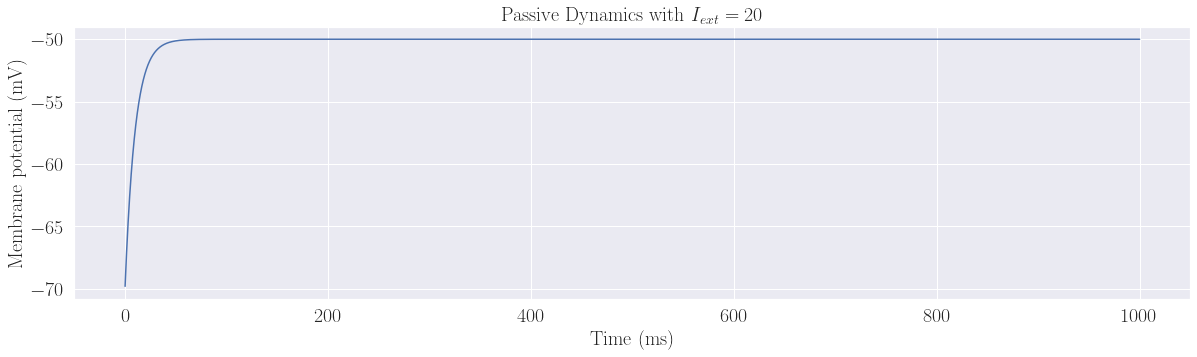

In [2]:
def simulate_passive(N_t, dt, V_init, E_m, I_ext, g_m, tau): 
    #I_ext is a constant 
    

    V = np.zeros([N_t+1])
    
    V[0] = V_init
    
    for t in range(1,N_t+1):
        dV = -(V[t-1] - E_m) + I_ext/g_m
        V[t] = V[t-1] + 1/tau * dt * dV
        
    return V

#parameters

#for Euler method
N_t = 10000
dt = 0.1

#for neuron
V_init =-70
E_m = -70
tau =10
g_m = 1
I_ext = 20


first_run = simulate_passive(N_t, dt, V_init, E_m, I_ext, g_m, tau)
fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(np.arange(0,N_t*dt, dt), first_run[1:])
ax.set_title('Passive Dynamics with $I_{ext} = 20$')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Membrane potential (mV)')
plt.show()


Effect of varying the initial condition, time constant and input current.

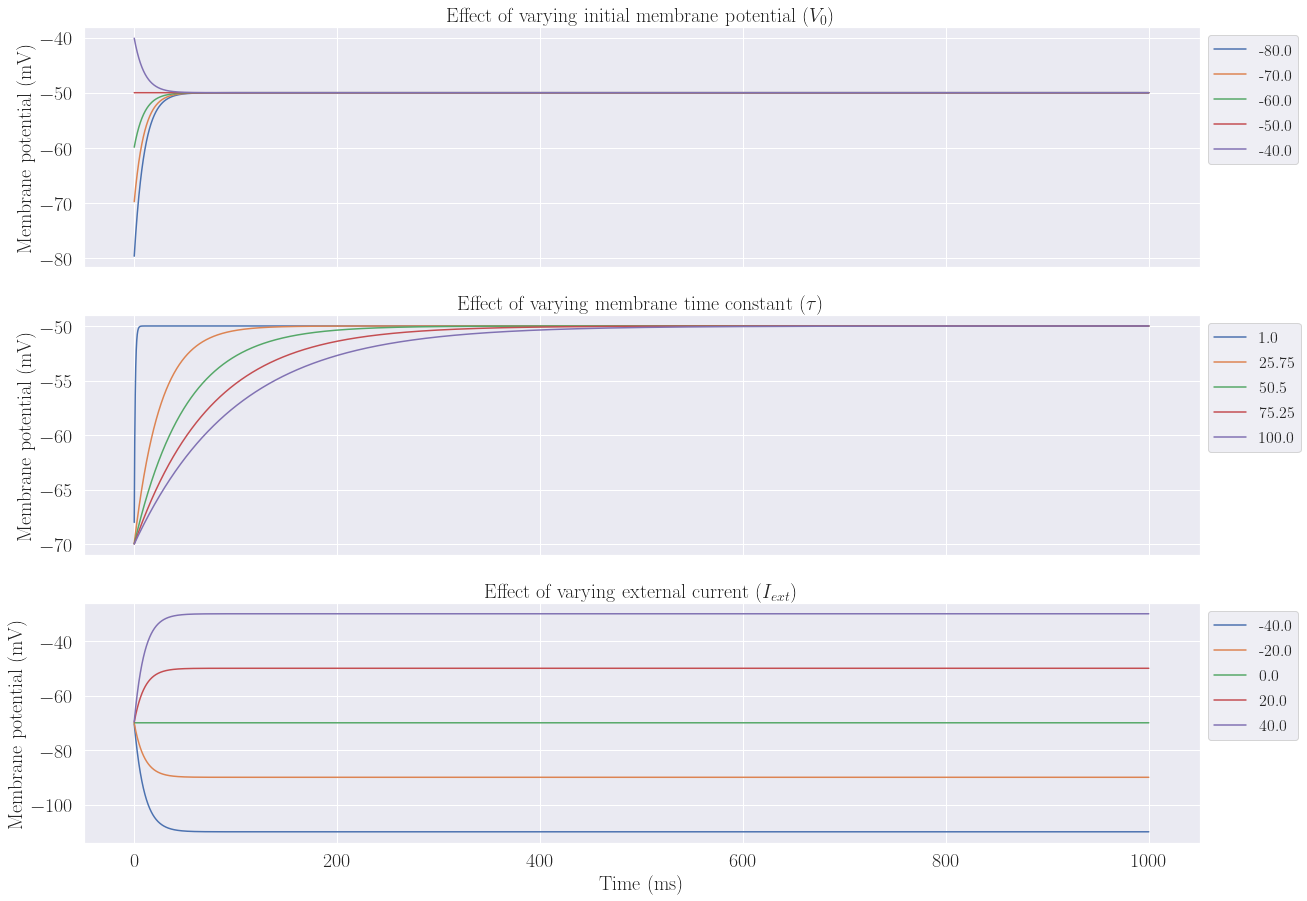

In [3]:
def simulate_passive_vectorized(N_t, dt,  V_init, E_m, I_ext, g_m, tau): 
    #I_ext is a vector
    #V_init is a vector 
    #tau is a vector
    

    V = np.zeros([N_t+1, V_init.shape[0]]) #(N+1)*Testnum
    
    V[0,:] = V_init[:]
    
    for t in range(1,N_t+1): #first value already given by V_init
        dV = -(V[t-1] - E_m) + I_ext/g_m
        V[t] = V[t-1] + 1/tau * dt * dV
        
    return V


##### varrying I_ext, tau, V_init

n_params = 3
values = 5

combs = n_params * values 

V_inits = np.zeros([combs]) - 70 
V_inits[:values] = np.linspace(-80,-40,values)
taus = np.zeros([combs]) + 10
taus[values:2*values] = np.linspace(1,100, values)
I_exts = np.zeros([combs])+20
I_exts[2*values:] = np.linspace(-40,40,5)

V_var = simulate_passive_vectorized(N_t, dt, V_inits, E_m, I_exts, g_m, taus)

fig, ax =  plt.subplots(3,1, sharex = True, figsize=(20,15))
for i in range(values): 
    ax[0].plot(np.arange(0,N_t*dt, dt), V_var[1:,i], label = V_inits[i])
    ax[1].plot(np.arange(0,N_t*dt, dt), V_var[1:,values+i], label = taus[values+i])
    ax[2].plot(np.arange(0,N_t*dt, dt), V_var[1:,2*values+i], label = I_exts[2*values+i])
ax[0].set_title('Effect of varying initial membrane potential ($V_0$)')
ax[1].set_title('Effect of varying membrane time constant ($\\tau$)')
ax[2].set_title('Effect of varying external current ($I_{ext}$)')
ax[2].set_xlabel('Time (ms)')
ax[0].set_ylabel('Membrane potential (mV)')
ax[1].set_ylabel('Membrane potential (mV)')
ax[2].set_ylabel('Membrane potential (mV)')
ax[0].legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize = 16)
ax[1].legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize = 16)
ax[2].legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize = 16)
plt.show()

Find the steady state of the simulation.

Steady state is reached if the derivative wrt time is 0, dV/dt = 0, so that V does not change in time. The steady state can be found analytically by setting dV/dt = 0 in the passive membrane potential equation, or numerically by simulating for long enough that V is approximately constant over consecutive time steps as shown below.


In [10]:
test = np.array([[1,2,3,4,5,6],[2,3,4,5,6,7],[3,4,5,6,7,8],[1,2,3,4,5,6],[1,2,3,4,5,6],[13,2,3,4,5,6],[12,2,3,4,5,6],[11,2,3,4,5,6]])
print(test[-1:])
print(test[-2:])
np.diff(test[-2:], axis = 0)[0]

[[11  2  3  4  5  6]]
[[12  2  3  4  5  6]
 [11  2  3  4  5  6]]


array([-1,  0,  0,  0,  0,  0])

[ -50.          -50.          -50.          -50.          -50.
  -50.          -50.          -50.00000005  -50.00003356  -50.00090347
 -110.          -90.          -70.          -50.          -30.        ]


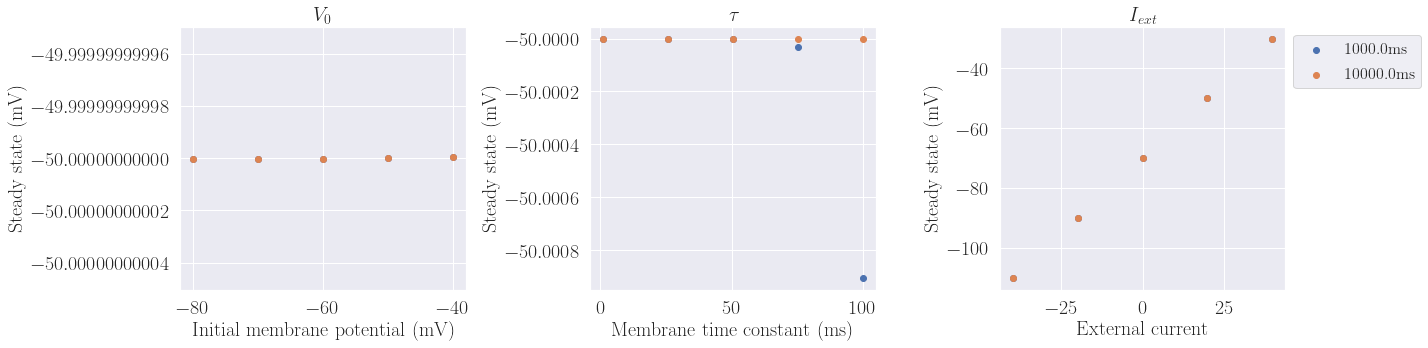

In [11]:
def check_steady_state(data, cut_off = 1e-6): 
   ## the cut off determines the maximum allowable change in V that is to be considered steady state 
    
    
    diff_V = np.diff(data[-2:], axis = 0)[0] #compute the last two datas' diff
    steady_state = (diff_V < cut_off) #check the diffunder cut_off
    
    return data[-1] * steady_state #return the last two datas' diff

s_states = check_steady_state(V_var)
print(s_states)

V_var_long = simulate_passive_vectorized(N_t*10, dt, V_inits, E_m, I_exts, g_m, taus)
s_states_long = check_steady_state(V_var_long)


fig, ax = plt.subplots(1,n_params, figsize = (20,5))
ax[0].scatter(V_inits[:values], s_states[:values], label = str(N_t*dt)+'ms')
ax[0].set_xlabel('Initial membrane potential (mV)')
ax[0].set_ylabel('Steady state (mV)')
ax[1].scatter(taus[values:2*values], s_states[values:2*values], label = str(N_t*dt)+'ms')
ax[1].set_xlabel('Membrane time constant (ms)')
ax[1].set_ylabel('Steady state (mV)')
ax[2].scatter(I_exts[2*values:], s_states[2*values:], label = str(N_t*dt)+'ms')
ax[2].set_xlabel('External current')
ax[2].set_ylabel('Steady state (mV)')
ax[0].scatter(V_inits[:values], s_states_long[:values], label = str(N_t*10*dt)+'ms')
ax[1].scatter(taus[values:2*values], s_states_long[values:2*values], label = str(N_t*10*dt)+'ms')
ax[2].scatter(I_exts[2*values:], s_states_long[2*values:], label = str(N_t*10*dt)+'ms')
ax[0].set_title('$V_0$')
ax[1].set_title('$\\tau$')
ax[2].set_title('$I_{ext}$')
ax[0].ticklabel_format(useOffset=False, style = 'plain')
ax[1].ticklabel_format(useOffset=False, style = 'plain')
ax[2].ticklabel_format(useOffset=False, style = 'plain')
ax[2].legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize = 16)
fig.tight_layout()
plt.show()

There is no effect of the time constant or initial membrane potential on the steady state. Any apparent differences get smaller the longer the simulation runs (see 2nd set of steady states plotted in orange). This indicates that the shorter simulation had not yet reached steady-state for big tau. The input current does affect the steady state. Note that all of this can easily be solved analytically and should agree with your simulations.

**2. Incorporating Spiking Into the Model**

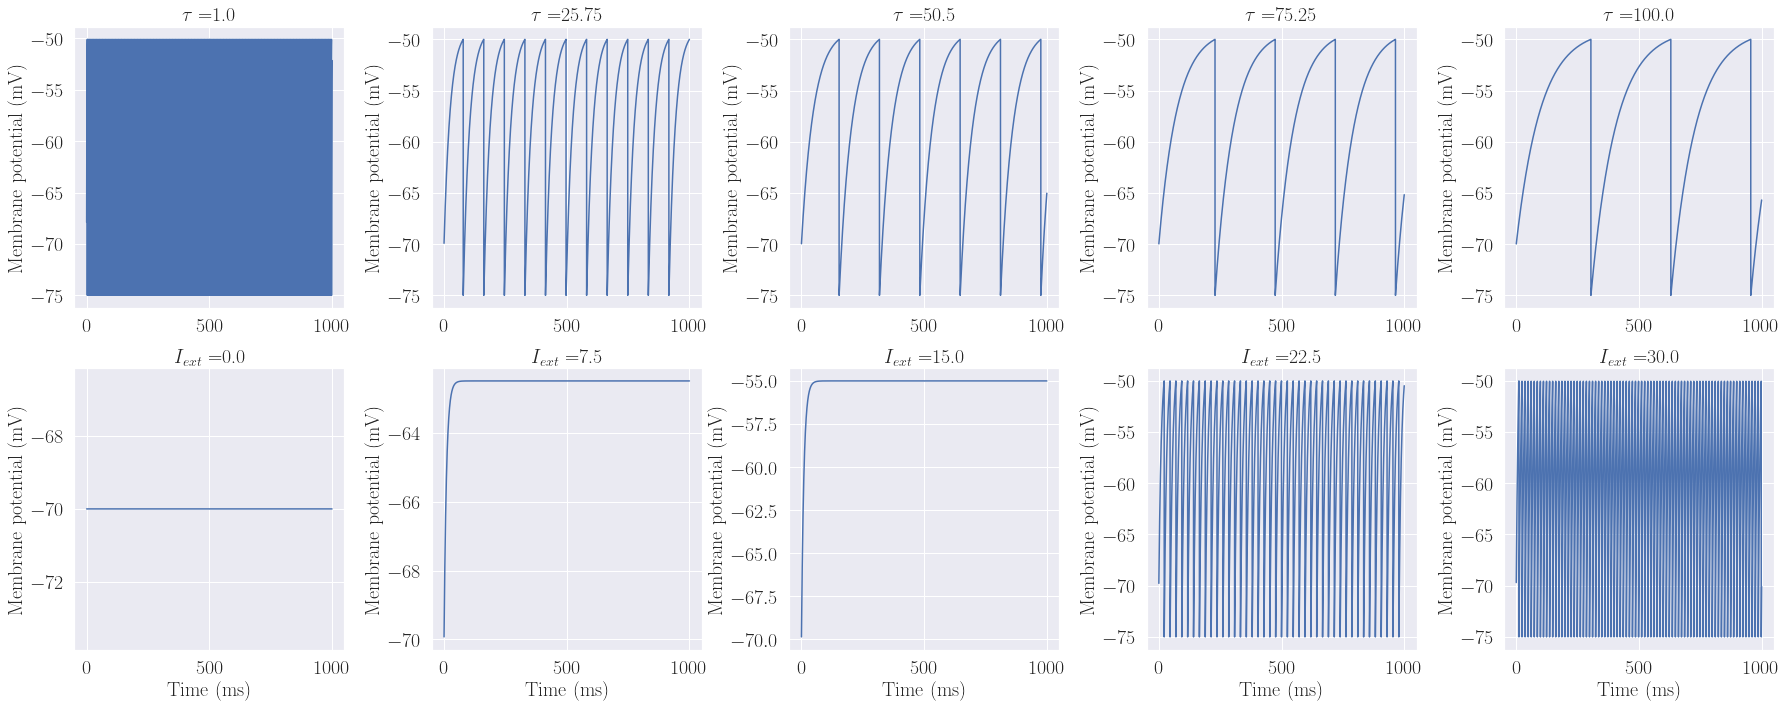

In [13]:
def spiking_LIF(N_t, dt,  V_init, E_m, Theta, V_reset, I_ext, g_m, tau): 

    V = np.zeros([N_t+1])
    spike_times = []
    
    V[0] = V_init
    
    for t in range(1,N_t+1): 
        dV = -(V[t-1] - E_m) + I_ext/g_m
        V[t] = V[t-1] + 1/tau * dt * dV
        if V[t] >= Theta: 
            #replace V[t] with reset potential
            V[t] = V_reset
            spike_times.append(t*dt) #here t is just a counting variable to compute the spiketime you need to take dt into account as well
        
    return V, spike_times

def spiking_LIF_vectorized(N_t, dt,  V_init, E_m, Theta, V_reset, I_ext, g_m, tau): 
    #I_ext is a vector
    #V_init is a vector 
    #tau is a vector
    
    
    n_neurons = V_init.shape[0]
    V = np.zeros([N_t+1, n_neurons])
    
    V[0,:] = V_init[:]
    spikes = np.zeros(V.shape)
    
    for t in range(1,N_t+1): 
        dV = -(V[t-1] - E_m) + I_ext/g_m
        V[t] = V[t-1] + 1/tau * dt * dV
        #check which neurons are spiking in this time step
        spiked = (V[t]>= Theta)
        V[t] = V_reset * spiked + V[t] * (spiked == 0.0) #spiked==1->V_reset, spiked==0->V_t
        spikes[t] = spiked * 1.0
    
    spike_times = []
    for n in range(n_neurons): #for every test num
        if np.any(spikes[:,n] == 1.0): #if there exist spikes
            spike_times.append(np.nonzero(spikes[:,n])) #np.nonzero retrive the nonzero data index
        else:
            spike_times.append(np.array([None]))
        
    return V, spikes, spike_times #spikes is (N+1)*Testnum, spike_times is (N+1)*NonzeroIndices

#parameters

#for Euler method
N_t = 10000
dt = 0.1

#for neuron
V_init =-70
E_m = -70
tau =10
g_m = 1
I_ext = 20

V_theta = -50
V_reset = -75

n_params = 2
values = 5
combs = n_params * values

V_inits = np.zeros([combs])
V_inits[:] = -70
taus = np.zeros([combs]) + 10
taus[:values] =  np.linspace(1,100, values)
I_exts = np.zeros([10]) + 21 
I_exts[values:] = np.linspace(0,30,5)

V_spike, spikes , spikes_t = (spiking_LIF_vectorized(N_t, dt, V_inits, E_m, V_theta, V_reset, I_exts, g_m, taus))

fig, ax = plt.subplots(n_params,values, figsize = (25,10))
for i in range(values): 
    ax[0,i].plot(np.arange(0,N_t*dt, dt),V_spike[1:,i])
    ax[0,i].set_title('$\\tau =$'+str(taus[i]))
    ax[1,i].plot(np.arange(0,N_t*dt, dt),V_spike[1:,i+values])
    ax[1,i].set_title('$I_{ext} =$'+str(I_exts[i+values]))
    ax[0,i].ticklabel_format(useOffset=False, style = 'plain')
    ax[1,i].ticklabel_format(useOffset=False, style = 'plain')
    ax[0,i].set_ylabel('Membrane potential (mV)')
    ax[1,i].set_ylabel('Membrane potential (mV)')
    ax[1,i].set_xlabel('Time (ms)')
    
fig.tight_layout()
plt.show()

We see that longer tau decreases spike rate and larger I_ext increases it. We next compute the ISI and spike rates from the spike times for different values of I_ext. 


[array([None], dtype=object), array([None], dtype=object), array([None], dtype=object), array([None], dtype=object), array([None], dtype=object), array([None], dtype=object), array([None], dtype=object), array([None], dtype=object), array([None], dtype=object), array([None], dtype=object), array([None], dtype=object), array([None], dtype=object), array([None], dtype=object), array([None], dtype=object), array([None], dtype=object), array([None], dtype=object), array([None], dtype=object), array([None], dtype=object), array([None], dtype=object), array([None], dtype=object), array([36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36.,
       36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36.]), array([27.3, 27.3, 27.3, 27.3, 27.3, 27.3, 27.3, 27.3, 27.3, 27.3, 27.3,
       27.3, 27.3, 27.3, 27.3, 27.3, 27.3, 27.3, 27.3, 27.3, 27.3, 27.3,
       27.3, 27.3, 27.3, 27.3, 27.3, 27.3, 27.3, 27.3, 27.3, 27.3, 27.3,
       27.3, 27.3]), array([23., 23., 23., 23., 23., 2

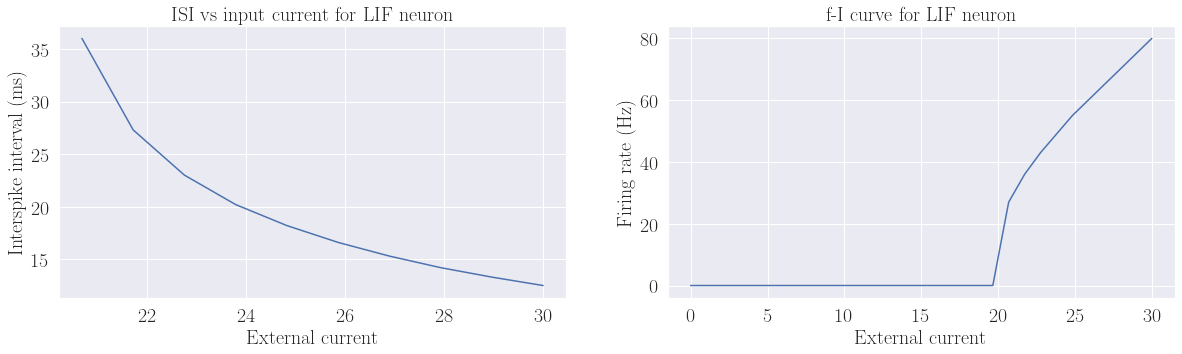

In [14]:
n_param = 1
n_values = 30
combs = n_param * n_values # how many combinations we will test; here: 100 values per parameter
V_inits = np.zeros([combs])
V_inits[:] = -70
taus = np.zeros([combs])
taus[:] = 10
I_exts = np.zeros([combs])
I_exts[:] = np.linspace(0,30,n_values)

V_spike, spikes, spikes_t = (spiking_LIF_vectorized(N_t, dt, V_inits, E_m, V_theta, V_reset, I_exts, g_m, taus))


def compute_ISI(spike_times, dt = 0.1): 
    
    ISI = []
    neurons = len(spike_times)
    for i in range(neurons): 
        #check if there are spike times and check if there has been more than 1 spiek to compute ISI
        if np.any(spike_times[i]):
            if len(spike_times[i][0]) > 1: #only when there are at least two spikes, frequency can be computed
                ISI.append(np.diff(spike_times[i])[0]*dt) #index diff (for the first two spikes) * time gap
        else: 
            ISI.append(np.array([None]))
        
    return ISI

ISI_raw = compute_ISI(spikes_t)
rate = np.zeros([combs])
ISI_filtered = np.zeros([combs])
# print(ISI_raw)
#compute mean ISI
for n in range(combs): 
    ISI_filtered[n] = ISI_raw[n][0] #all ISI for one parameter setting have the same value, therefore we take the first
    rate[n] = np.sum(spikes[:,n])/ ((N_t*dt)/1000) #spike rate in Hz = 1/s

# print(ISI_filtered)
fig, ax = plt.subplots(1,2, figsize = (20,5))
ax[0].plot( I_exts, ISI_filtered)
ax[0].set_ylabel('Interspike interval (ms)')
ax[0].set_title('ISI vs input current for LIF neuron')
ax[0].set_xlabel('External current')
ax[1].plot(I_exts, rate)
ax[1].set_ylabel('Firing rate (Hz)')
ax[1].set_xlabel('External current')
ax[1].set_title('f-I curve for LIF neuron')
plt.show()

This reproduces the analytical result we derived in lecture 4.

**3. Adding Noise to the Input**

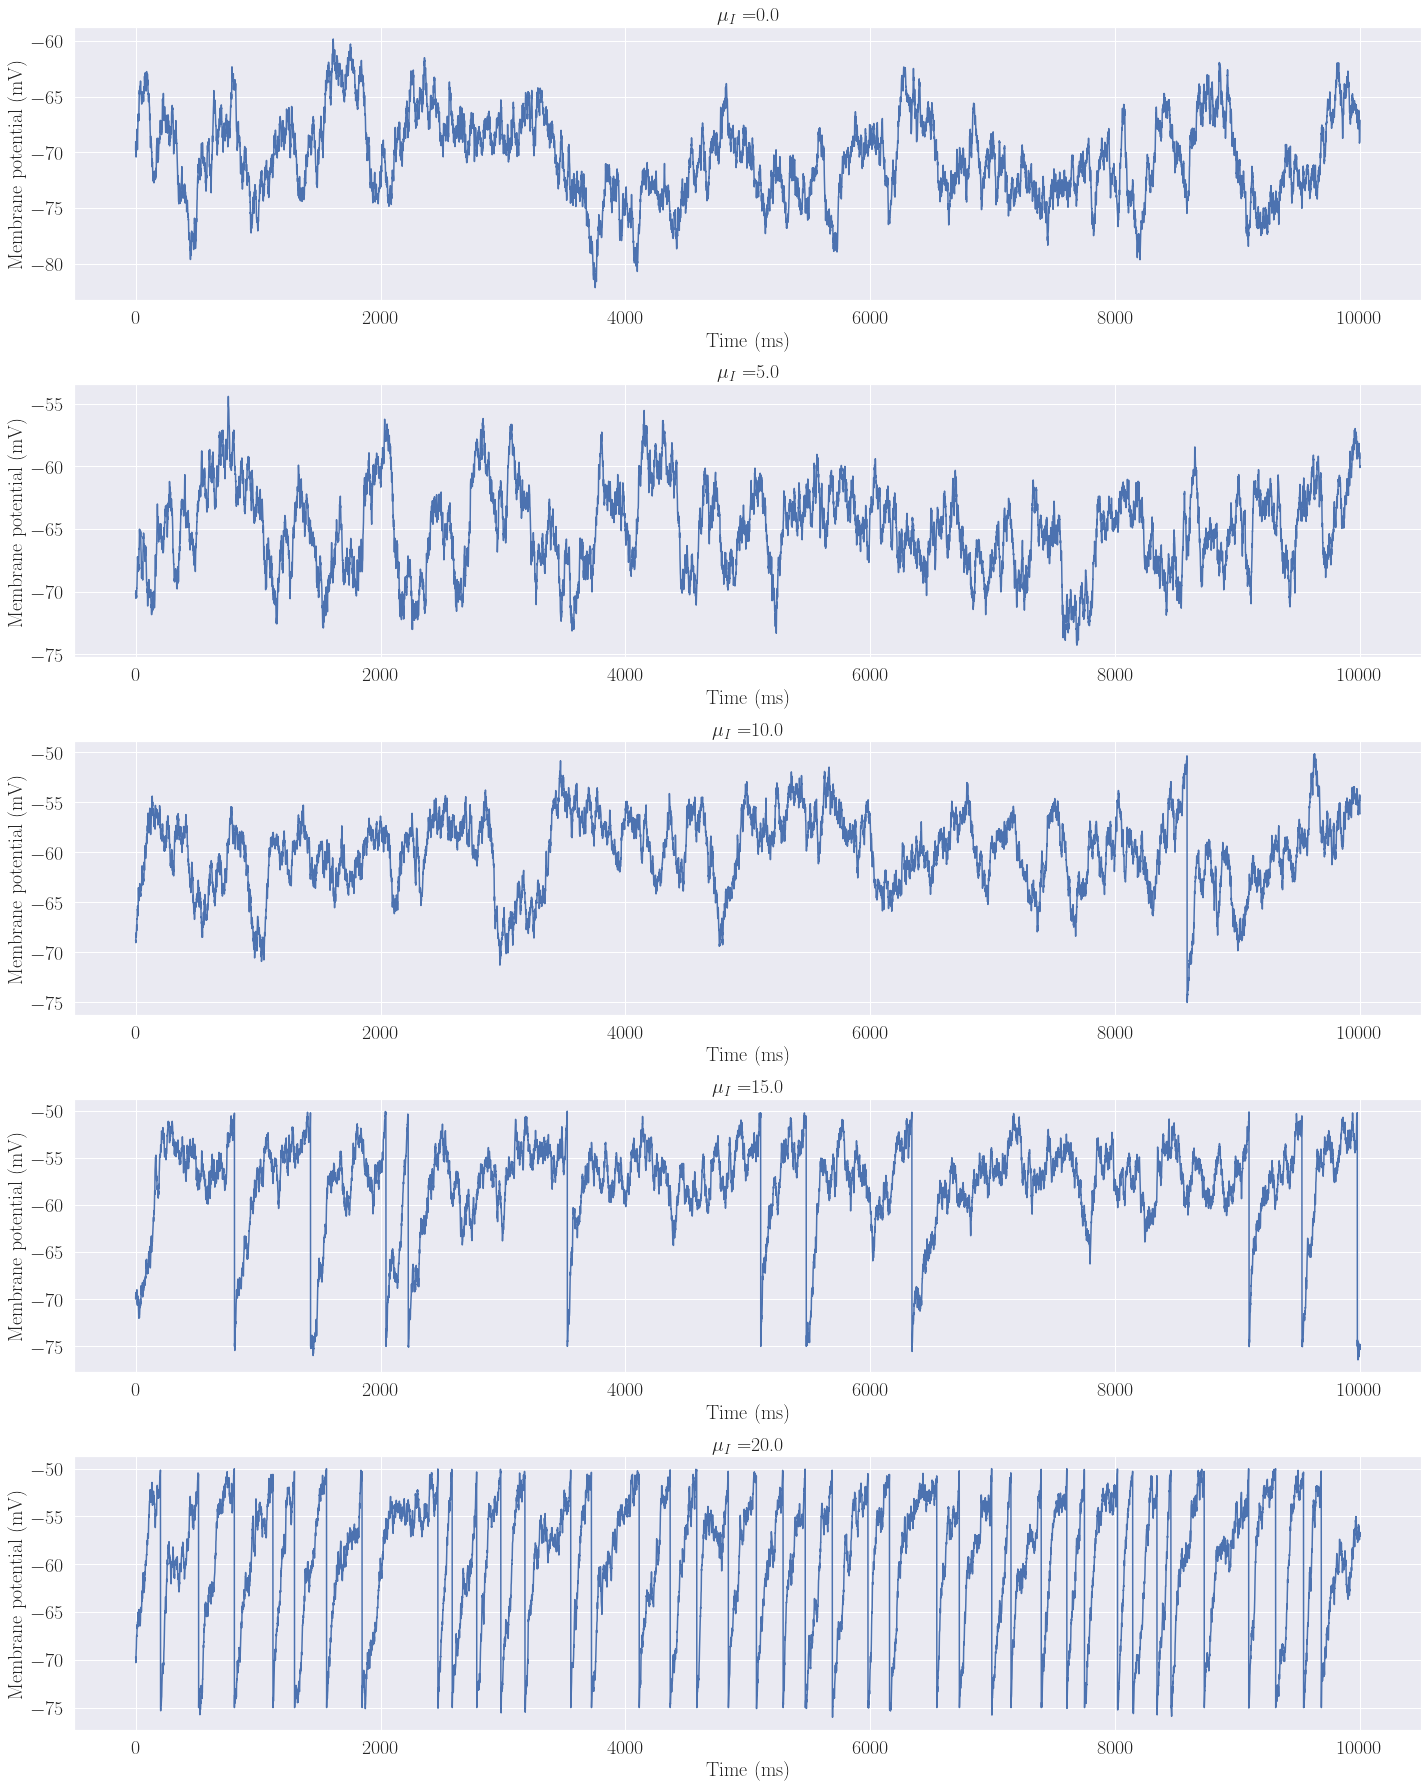

In [210]:
def noisy_spiking_LIF(N_t, dt,  V_init, E_m, Theta, V_reset, tau, mu_I, sigma_I, rng = 5): 
    
    n_neurons = mu_I.shape[0]
    V = np.zeros([N_t+1, n_neurons])
    
    #ensures that multiple runs of the function will result in the same draw of random numbers
    rn_seed = np.random.RandomState(seed = rng)
    
    V[0,:] = V_init
    spikes = np.zeros(V.shape)
    
    for t in range(1,N_t+1):
        dV = -(V[t-1] - E_m) 
        I = mu_I + (1/np.sqrt(dt)) * sigma_I * rn_seed.randn(n_neurons) #I=mu+1/dt*sigma*whitenoise
        V[t] = V[t-1] + 1/tau * dt * (dV + I)
        #check spike and reset
        spiked = (V[t]>= Theta)
        V[t] = V_reset * spiked + V[t] * (spiked == 0.0)
        spikes[t] = spiked * 1.0
    
    spike_times = []
    for n in range(n_neurons): 
        if np.any(spikes[:,n] == 1.0):
            spike_times.append(np.nonzero(spikes[:,n]))
        else:
            spike_times.append(np.array([None]))
        
    return V, spikes, spike_times

#parameters

#for Euler method
N_t = 10000
dt = 0.1

#for neuron
V_init =-70
E_m = -70
tau =10
V_reset = -75
V_theta = -50


values = 5
sigma_I = 15
mu_Is = np.linspace(0,20,values)

V, spikes, spikes_t = noisy_spiking_LIF(N_t, dt, V_init, E_m, V_theta, V_reset, tau, mu_Is, sigma_I)
fig, ax = plt.subplots(5,1, figsize = (20,25))
for i in range(values): 
    ax[i].plot(V[1:,i])
    ax[i].set_title('$\\mu_I =$'+str(mu_Is[i]))
    ax[i].set_xlabel('Time (ms)')
    ax[i].set_ylabel('Membrane potential (mV)')
fig.tight_layout()
plt.show()

We see that increasing mean input causes spiking to become more frequent and more regular. Notice that spikes now occur even for mu_I=15, which was not the case without the noise. We next compute the f-I curve for this noisy input current

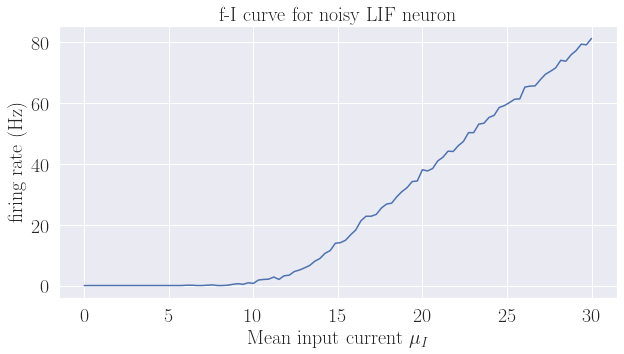

In [212]:
values = 100
sigma_I = 15
mu_Is = np.linspace(0, 30 ,values)
N_t = 100000  

V, spikes, spikes_t = noisy_spiking_LIF(N_t, dt, V_init, E_m, V_theta, V_reset, tau, mu_Is, sigma_I)

rate = np.sum(spikes, axis = 0)/ ((N_t*dt)/1000)
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(mu_Is, rate)
ax.set_ylabel('firing rate (Hz)')
ax.set_xlabel('Mean input current $\mu_I$')
ax.set_title('f-I curve for noisy LIF neuron')
plt.show()

Notice that the kink in the noise-free f-I curve has been smoothed due to the addition of noise. 

We next plot ISI distributions of different mu_I and sigma_I (mean current and noise of current). Notice that the distributions are most exponential when mu is small relative to sigma, consistent with Poisson variability in the fluctuation-driven regime discussed in lecture 4.

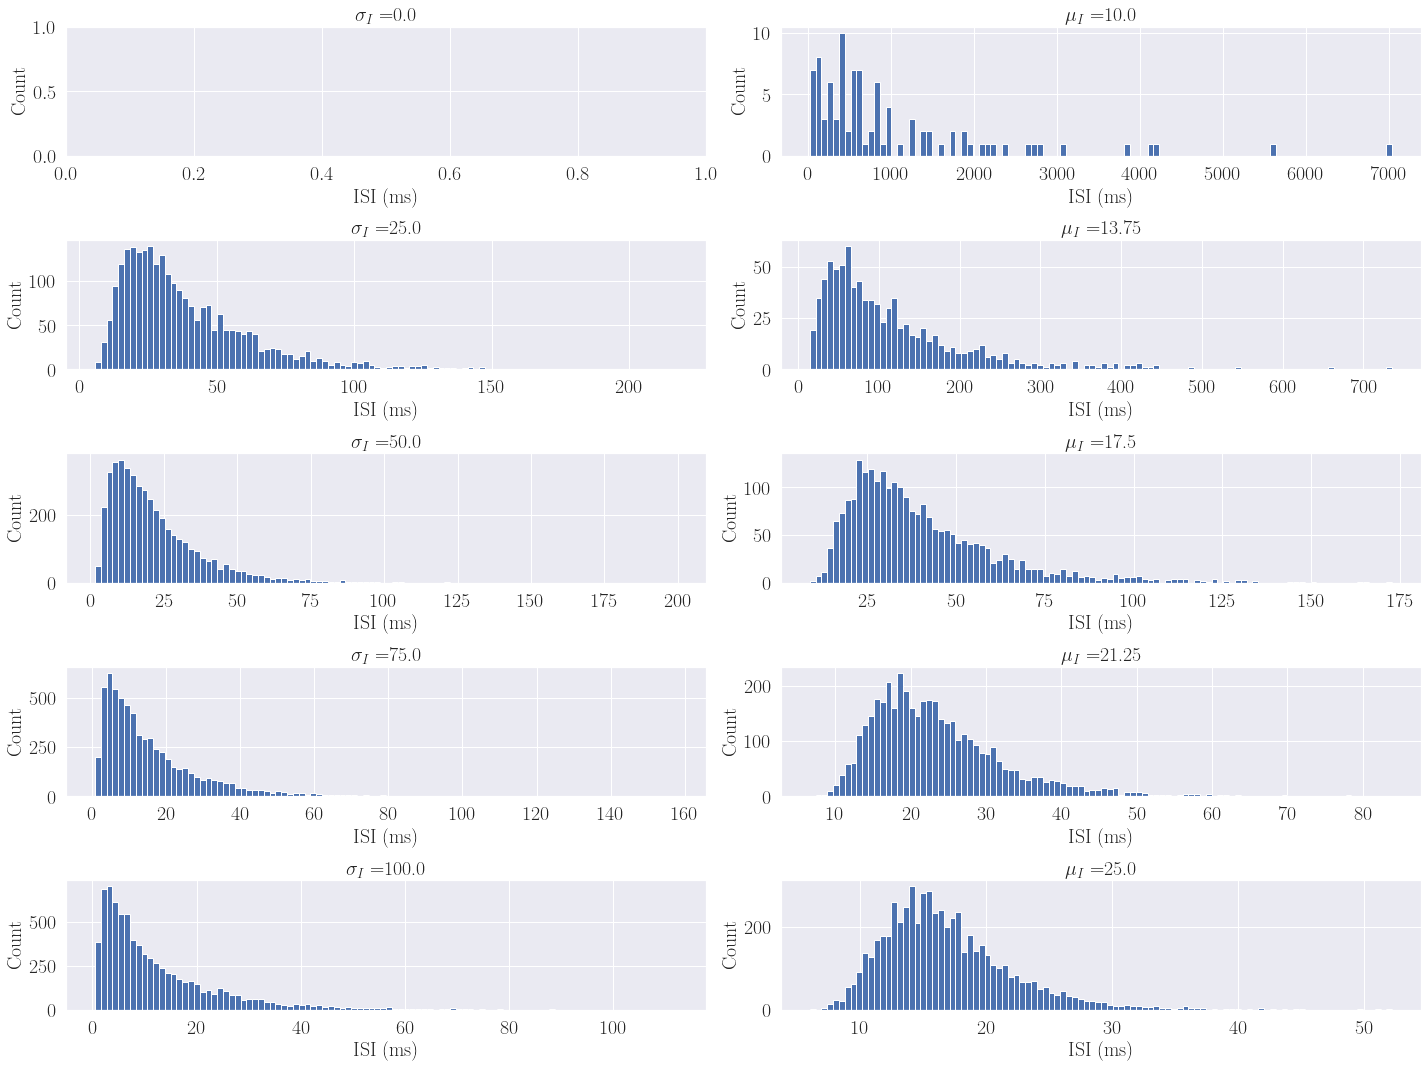

In [213]:
values = 5
params = 2
combs = values*params
sigma_Is = np.zeros([combs]) + 15
mu_Is = np.zeros([combs]) + 15
sigma_Is[:values] = np.linspace(0,100,values)
mu_Is[values:] = np.linspace(10,25, values)

N_t = 50000

V, spikes, spikes_t = noisy_spiking_LIF(N_t*20, dt, V_init, E_m, V_theta, V_reset, tau, mu_Is, sigma_Is)

ISI_raw = compute_ISI(spikes_t)
rate = np.sum(spikes, axis = 0)/(N_t*dt)

fig,ax = plt.subplots(values,params, figsize = (20,3*values))
for i in range(values): 
    if ISI_raw[i][0] is not None: 
        ax[i,0].hist(ISI_raw[i], bins = 100)
    if ISI_raw[i+values][0] is not None: 
        ax[i,1].hist(ISI_raw[i+values], bins = 100)
    ax[i,1].set_xlabel('ISI (ms)')
    ax[i,0].set_xlabel('ISI (ms)')
    ax[i,0].set_title('$\sigma_I=$'+str(sigma_Is[i]))
    ax[i,1].set_title('$\mu_I=$'+str(mu_Is[i+values]))
    ax[i,1].set_ylabel('Count')
    ax[i,0].set_ylabel('Count')


fig.tight_layout()
plt.show()


**4.Conductance-Based Synaptic Input**

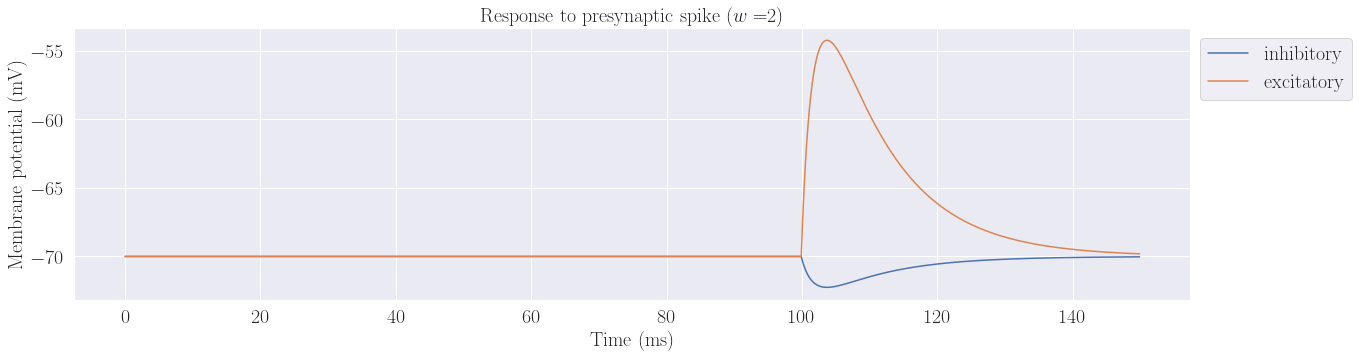

In [214]:
def conductance_spiking_LIF(N_t, dt,  V_init, E_m, Theta, V_reset, tau, g_m, E_syn, w, tau_syn, t_spike): 
    
    V = np.zeros([N_t+1])

    
    V[0] = V_init
    spikes = np.zeros(V.shape)
    g_syn = np.zeros(V.shape)
    spike_times = []
    
    for t in range(1,N_t+1): 
        
        g_syn[t] = w * np.sum(np.exp(-(t*dt - t_spike)/tau_syn) * ((t*dt - t_spike) > 0))
        dV = -(V[t-1] - E_m) - g_syn[t] * (V[t-1] - E_syn)/g_m #-Iext
        V[t] = V[t-1] + 1/tau * dt * dV 
        if V[t]>= Theta:
            V[t] = V_reset 
            spike_times.append(t*dt)
            spikes[t] = 1.0
        
    return V, spikes, spike_times, g_syn

#for Euler method
N_t = 1500
dt = 0.1

#for neuron
V_init =-70
E_m = -70
tau =10
g_m = 1
I_ext = 20
V_reset = -75
V_theta = -50

#synapse parameters
w = 2
E_syn = -80
tau_syn = 2
pre_spike = 100

V_inh, spikes_inh, t_spike_inh , g_inh= conductance_spiking_LIF(N_t, dt, V_init, E_m, V_theta, V_reset, tau, g_m, E_syn, w, tau_syn, pre_spike)


E_syn = -0
V_exc, spikes_exc, t_spike_exc, g_exc = conductance_spiking_LIF(N_t, dt, V_init, E_m, V_theta, V_reset, tau, g_m, E_syn, w, tau_syn, pre_spike)


fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(np.arange(0,N_t*dt, dt), V_inh[1:], label = 'inhibitory')
ax.plot(np.arange(0,N_t*dt, dt), V_exc[1:], label = 'excitatory')
ax.ticklabel_format(useOffset=False, style = 'plain')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Membrane potential (mV)')
ax.set_title('Response to presynaptic spike ($w=$'+str(w)+')')
ax.legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize = 20)
plt.show()

Synaptic input pulls the membrane potential towards the reversal potential of the synapse (excitatory or inhibitory). For larger w or additional input spikes, this can cause a spike to occur (you can check this yourself).

Poisson input


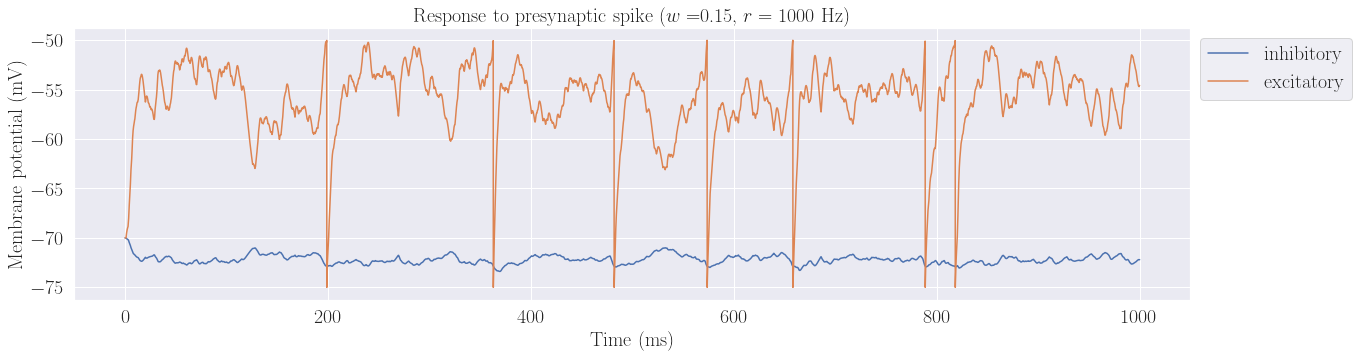

In [215]:
def poisson_ISI(time_steps, rate, dt, rng = 5): 
    
    rand_gen = np.random.RandomState(seed = rng)
    sp_ext = (rand_gen.rand(time_steps) < rate*dt/1000) #spike train
    t_sp_ext = np.nonzero(sp_ext)[0]*dt
    
    return t_sp_ext

N_t = 10000
rate = 1000
pre_spikes = poisson_ISI(N_t, rate, dt)


E_syn = -80
tau_syn = 2
w = 0.15

V_inh, spikes_inh, t_spike_inh , g_inh= conductance_spiking_LIF(N_t, dt, V_init, E_m, V_theta, V_reset, tau, g_m, E_syn, w, tau_syn, pre_spikes)

E_syn = -0
V_exc, spikes_exc, t_spike_exc, g_exc = conductance_spiking_LIF(N_t, dt, V_init, E_m, V_theta, V_reset, tau, g_m, E_syn, w, tau_syn, pre_spikes)


fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(np.arange(0,N_t*dt, dt), V_inh[1:], label = 'inhibitory')
ax.plot(np.arange(0,N_t*dt, dt), V_exc[1:], label = 'excitatory')
ax.ticklabel_format(useOffset=False, style = 'plain')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Membrane potential (mV)')
ax.legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize = 20)
ax.set_title('Response to presynaptic spike ($w=$'+str(w)+', $r=1000$ Hz)')
plt.show()

Poisson input with large rate and low weight produce the most Poisson-like spiking activity. This is because the net input becomes approximately Gaussian white noise (as discussed in lecture 4). This is consistent with the results of the ISI distributions plotted above.